# Merging all separate datasets

# Load Data Set:

In [1]:
import pandas as pd
dataset = 'Training.csv'
rain = pd.read_csv(dataset)
rain.head()

,Date,Total Rainfall (mm),Mean Wind Speed (km/h),Mean Amount of Cloud (%),Humidity,Sun,Maximum Temperature,Minimum Temperature,Mean Temperature
0,2020-01-01,0,7.0,92.0,80,0.2,18.6,16.7,17.5
1,2020-01-02,0,4.8,54.0,78,3.6,20.3,14.5,17.5
2,2020-01-03,0,4.2,47.0,82,8.9,23.5,14.4,18.4
3,2020-01-04,0.5,4.1,62.0,83,8.6,23.9,14.1,18.4
4,2020-01-05,0,6.8,81.0,79,6.6,23.2,18.4,20.3


# Checking the Dimensions of Dataset: 

In [2]:
print(rain.shape)

(1461, 9)


# Data Preprocessing:

In [3]:
rain.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1461 entries, 0 to 1460
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Date                      1461 non-null   object 
 1   Total Rainfall (mm)       1461 non-null   object 
 2   Mean Wind Speed (km/h)    1461 non-null   float64
 3   Mean Amount of Cloud (%)  1461 non-null   float64
 4   Humidity                  1461 non-null   int64  
 5   Sun                       1461 non-null   float64
 6   Maximum Temperature       1461 non-null   object 
 7   Minimum Temperature       1461 non-null   object 
 8   Mean Temperature          1461 non-null   object 
dtypes: float64(3), int64(1), object(5)
memory usage: 102.9+ KB


To summarize and describe the features of data in a meaningful way to extract insights. We use two types of statistic to describe or summarize data:

Measures of tendency
Measures of spread

In [4]:
rain.describe(exclude=[object])

,Mean Wind Speed (km/h),Mean Amount of Cloud (%),Humidity,Sun
count,1461.000000,1461.000000,1461.000000,1461.000000
mean,7.177139,68.490075,76.427789,5.512731
std,3.006604,23.284410,10.216614,3.842957
min,1.900000,1.000000,28.000000,0.000000
25%,5.000000,55.000000,72.000000,1.500000
50%,6.500000,78.000000,77.000000,5.900000
75%,8.400000,87.000000,83.000000,9.300000
max,20.300000,100.000000,96.000000,12.200000


In [5]:
rain.describe(include=[object])

,Date,Total Rainfall (mm),Maximum Temperature,Minimum Temperature,Mean Temperature
count,1461,1461,1461,1461,1461
unique,1461,124,230,223,213
top,2020-01-01,0,33.2,26.5,29
freq,1,924,24,32,25


Convert Temperature attributes to numeric values:


In [6]:
# Convert Temperature attributes to numeric values:
rain['Maximum Temperature'] = pd.to_numeric(rain['Maximum Temperature'], errors='coerce')
rain['Minimum Temperature'] = pd.to_numeric(rain['Minimum Temperature'], errors='coerce')
rain['Mean Temperature'] = pd.to_numeric(rain['Mean Temperature'], errors='coerce')

In [7]:
print(rain.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1461 entries, 0 to 1460
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Date                      1461 non-null   object 
 1   Total Rainfall (mm)       1461 non-null   object 
 2   Mean Wind Speed (km/h)    1461 non-null   float64
 3   Mean Amount of Cloud (%)  1461 non-null   float64
 4   Humidity                  1461 non-null   int64  
 5   Sun                       1461 non-null   float64
 6   Maximum Temperature       1459 non-null   float64
 7   Minimum Temperature       1459 non-null   float64
 8   Mean Temperature          1459 non-null   float64
dtypes: float64(6), int64(1), object(2)
memory usage: 102.9+ KB
None


In [8]:
rain.describe(exclude=[object])

,Mean Wind Speed (km/h),Mean Amount of Cloud (%),Humidity,Sun,Maximum Temperature,Minimum Temperature,Mean Temperature
count,1461.000000,1461.000000,1461.000000,1461.000000,1459.000000,1459.000000,1459.000000
mean,7.177139,68.490075,76.427789,5.512731,27.356614,21.459493,24.061069
std,3.006604,23.284410,10.216614,3.842957,5.347649,5.490374,5.237383
min,1.900000,1.000000,28.000000,0.000000,9.200000,3.400000,8.200000
25%,5.000000,55.000000,72.000000,1.500000,23.450000,17.200000,19.900000
50%,6.500000,78.000000,77.000000,5.900000,28.100000,22.500000,24.900000
75%,8.400000,87.000000,83.000000,9.300000,32.000000,26.300000,28.800000
max,20.300000,100.000000,96.000000,12.200000,37.200000,29.500000,32.300000


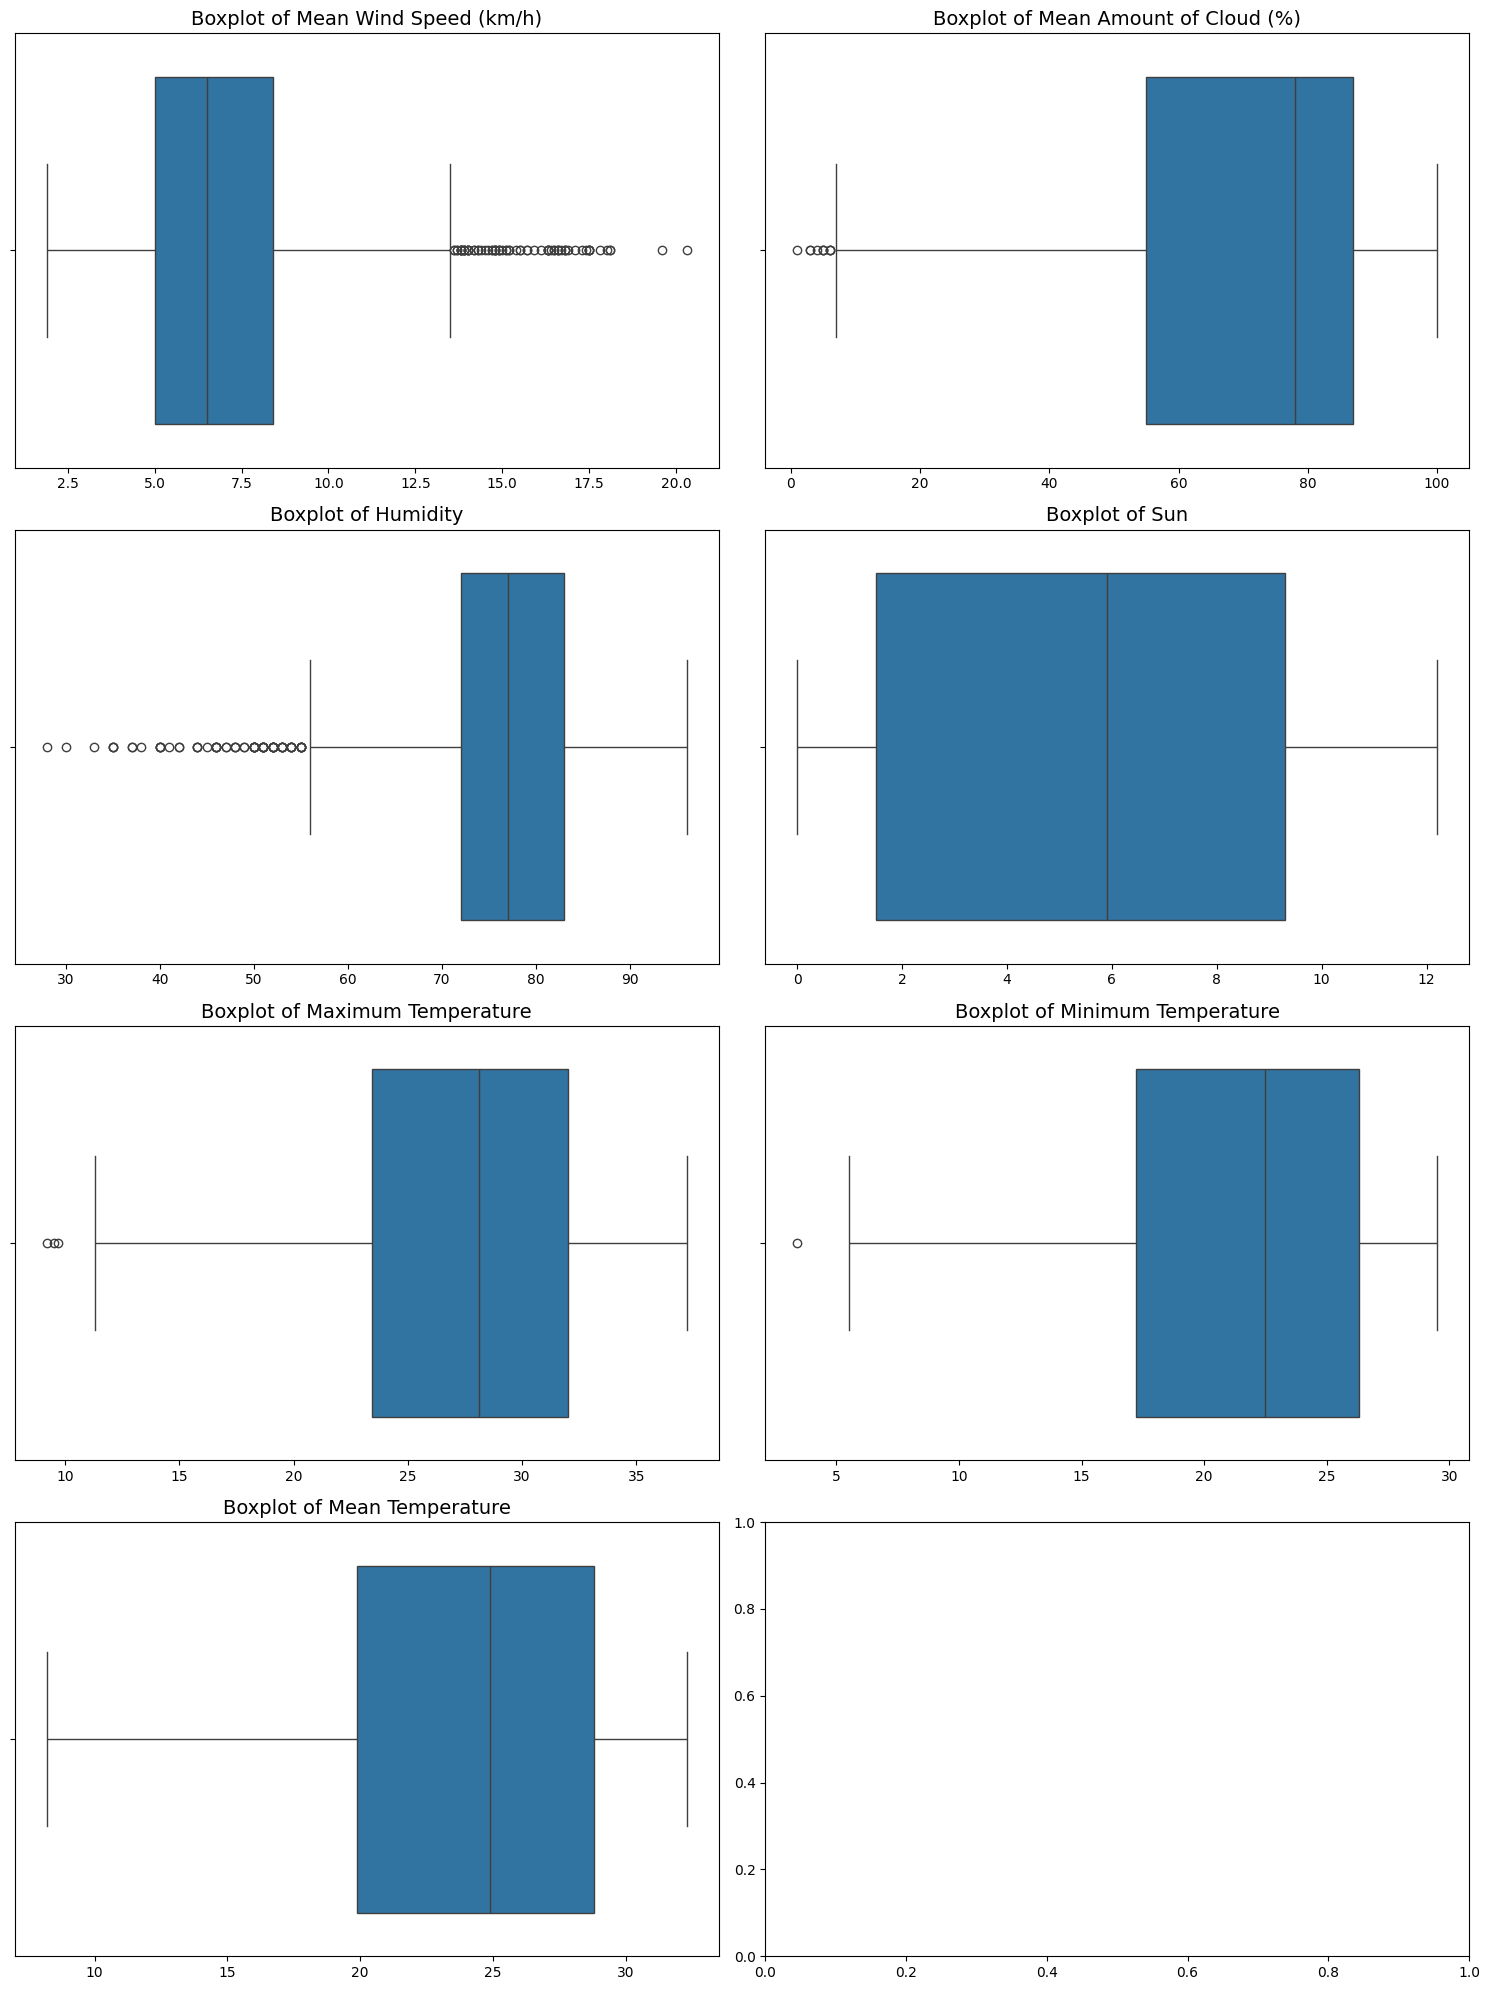

In [9]:
from matplotlib import pyplot as plt
import seaborn as sns

columns_to_convert = [
    'Mean Wind Speed (km/h)', 'Mean Amount of Cloud (%)','Humidity','Sun', 'Maximum Temperature', 'Minimum Temperature', 'Mean Temperature'
]

# Create a figure object to hold the subplots
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(15, 20))

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Plot a boxplot for each column that we're interested in
for i, col in enumerate(columns_to_convert):
    sns.boxplot(x=rain[col], ax=axes[i])
    axes[i].set_title(f'Boxplot of {col}', fontsize=14)
    axes[i].set_xlabel('')

# Adjust layout and show the plot
plt.tight_layout()
plt.show()

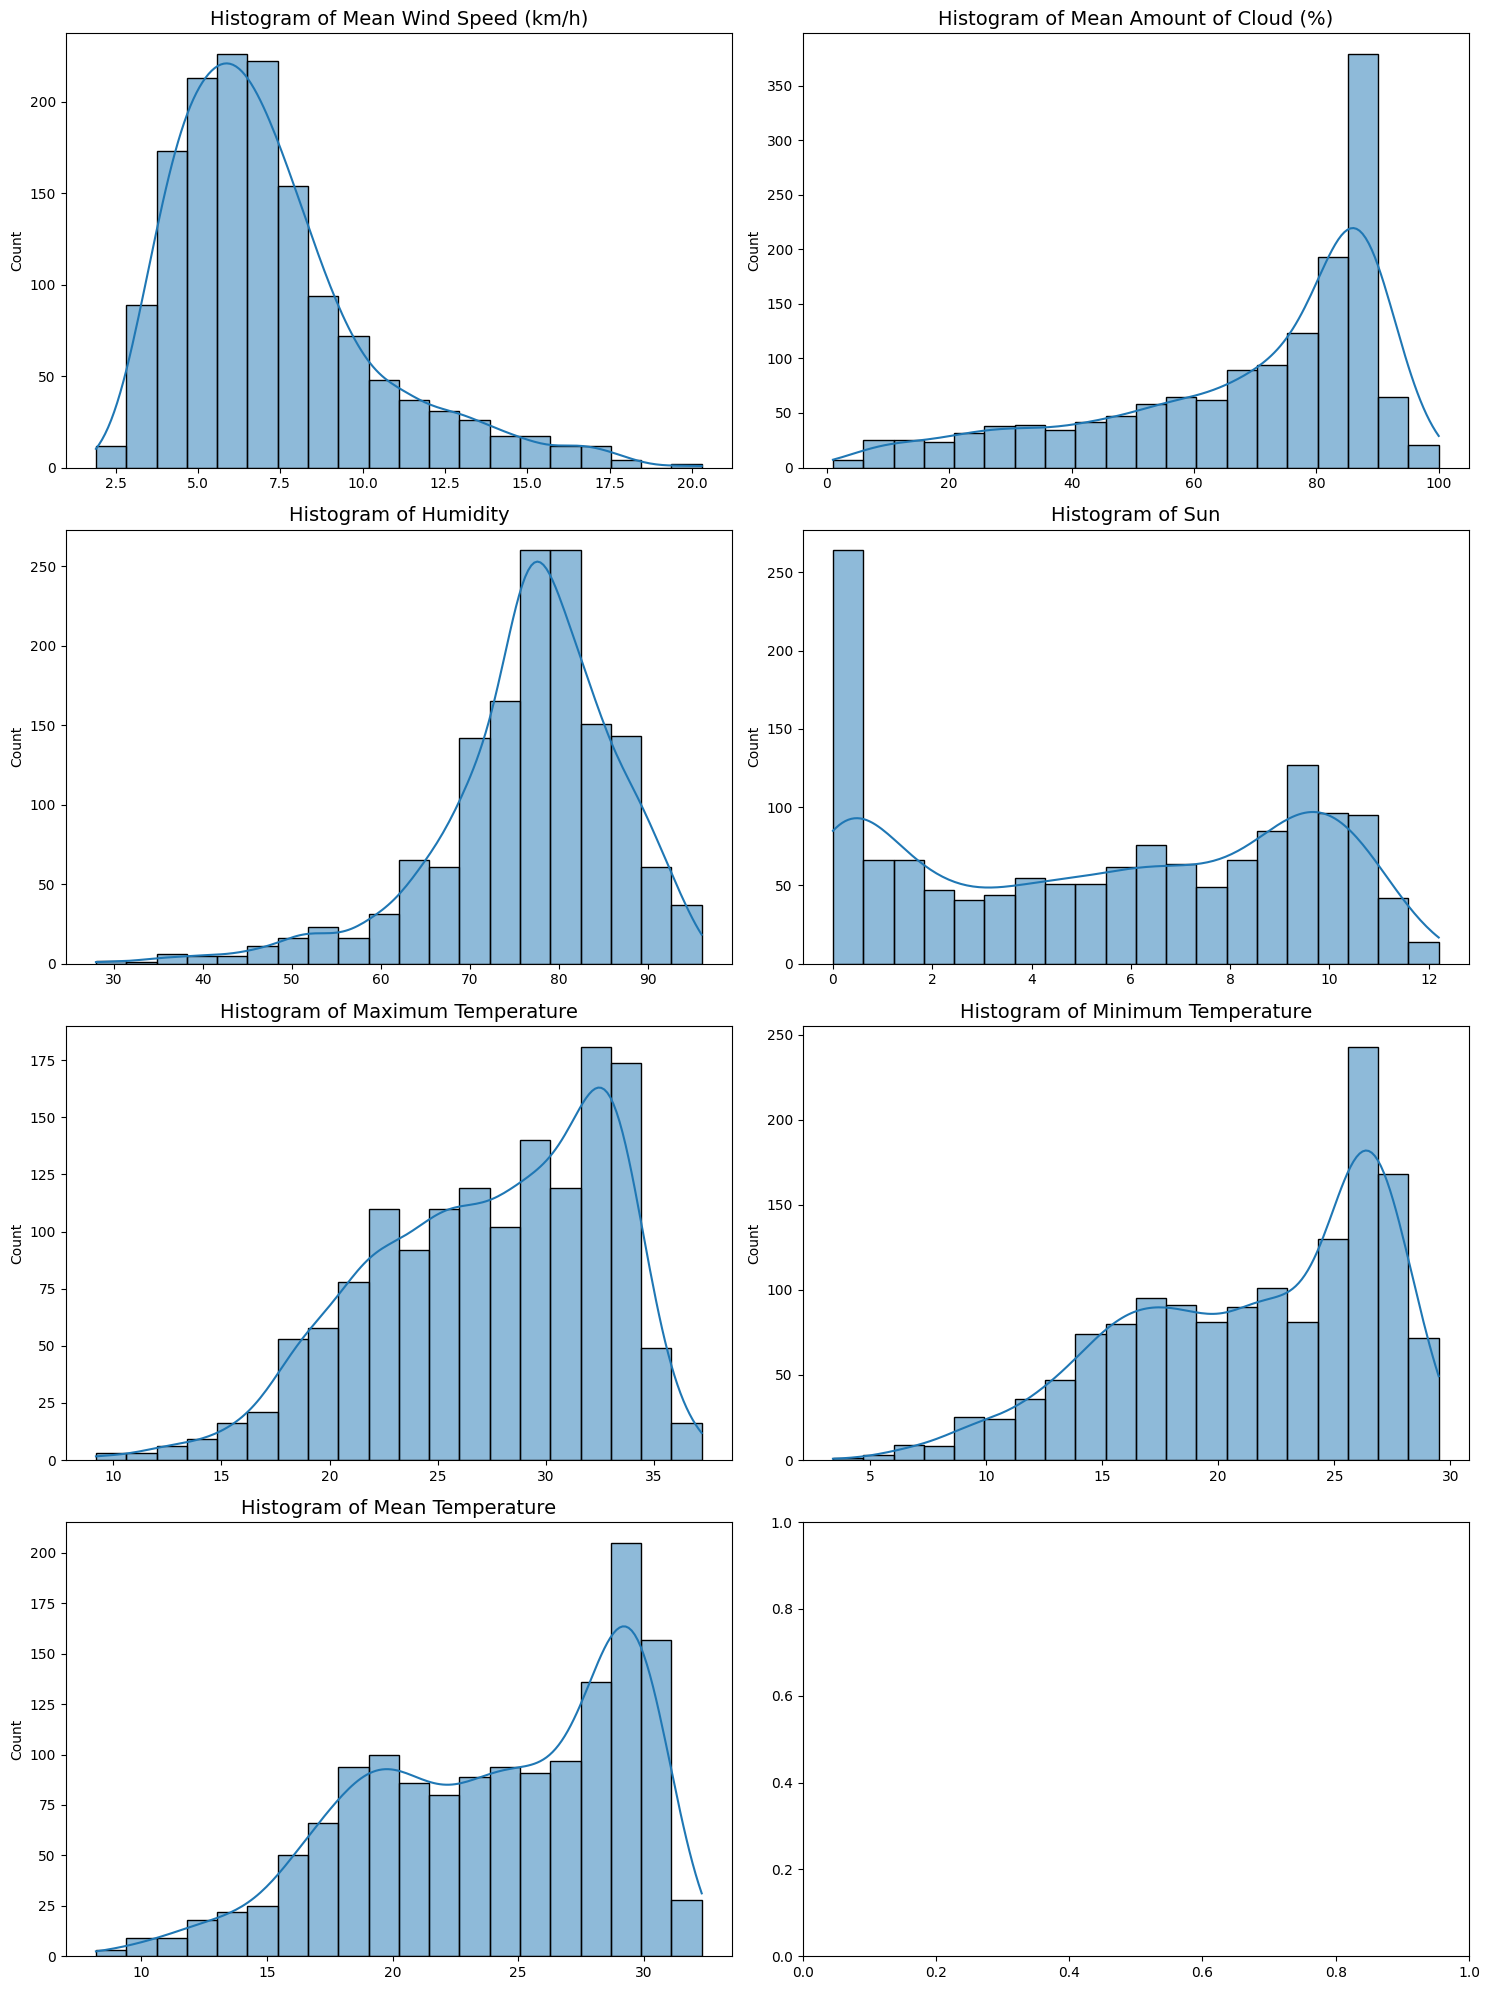

In [10]:
# Create a figure object for histograms
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(15, 20))

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Plot a histogram for each column
for i, col in enumerate(columns_to_convert):
    sns.histplot(rain[col], bins=20, kde=True, ax=axes[i])
    axes[i].set_title(f'Histogram of {col}', fontsize=14)
    axes[i].set_xlabel('')

# Adjust layout and show the plot
plt.tight_layout()
plt.show()


# Encode Y variables into {1,0}:

In [11]:
# Convert 'Total Rainfall (mm)' from string to float
rain['Total Rainfall (mm)'] = pd.to_numeric(rain['Total Rainfall (mm)'], errors='coerce')

# Add a new column 'RainEvent'
# This column will be 1 if 'Total Rainfall (mm)' is greater than 0, otherwise 0
rain['RainIndicator'] = (rain['Total Rainfall (mm)'] > 0).astype(int)

# Display the head of the dataframe to see the new 'RainEvent' column
rain.head()

,Date,Total Rainfall (mm),Mean Wind Speed (km/h),Mean Amount of Cloud (%),Humidity,Sun,Maximum Temperature,Minimum Temperature,Mean Temperature,RainIndicator
0,2020-01-01,0.0,7.0,92.0,80,0.2,18.6,16.7,17.5,0
1,2020-01-02,0.0,4.8,54.0,78,3.6,20.3,14.5,17.5,0
2,2020-01-03,0.0,4.2,47.0,82,8.9,23.5,14.4,18.4,0
3,2020-01-04,0.5,4.1,62.0,83,8.6,23.9,14.1,18.4,1
4,2020-01-05,0.0,6.8,81.0,79,6.6,23.2,18.4,20.3,0


In [12]:
print(rain.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1461 entries, 0 to 1460
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Date                      1461 non-null   object 
 1   Total Rainfall (mm)       1460 non-null   float64
 2   Mean Wind Speed (km/h)    1461 non-null   float64
 3   Mean Amount of Cloud (%)  1461 non-null   float64
 4   Humidity                  1461 non-null   int64  
 5   Sun                       1461 non-null   float64
 6   Maximum Temperature       1459 non-null   float64
 7   Minimum Temperature       1459 non-null   float64
 8   Mean Temperature          1459 non-null   float64
 9   RainIndicator             1461 non-null   int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 114.3+ KB
None


# Finding Categorical and Numerical Features in a Data set:

In [13]:
categorical_features = [column_name for column_name in rain.columns if rain[column_name].dtype == 'O']
print("Number of Categorical Features: {}".format(len(categorical_features)))
print("Categorical Features: ",categorical_features)

Number of Categorical Features: 1
Categorical Features:  ['Date']


In [14]:
numerical_features = [column_name for column_name in rain.columns if rain[column_name].dtype != 'O']
print("Number of Numerical Features: {}".format(len(numerical_features)))
print("Numerical Features: ",numerical_features)

Number of Numerical Features: 9
Numerical Features:  ['Total Rainfall (mm)', 'Mean Wind Speed (km/h)', 'Mean Amount of Cloud (%)', 'Humidity', 'Sun', 'Maximum Temperature', 'Minimum Temperature', 'Mean Temperature', 'RainIndicator']


# Cardinality check for Categorical features:
Cardinality: The number of unique values in each categorical feature is known as cardinality.

In [15]:
unique_values = len(rain['Total Rainfall (mm)'].unique())
print("Cardinality(no. of unique values) of 'Total Rainfall (mm)' are: {}".format(unique_values))

Cardinality(no. of unique values) of 'Total Rainfall (mm)' are: 124


In [16]:
unique_values2 = len(rain['Date'].unique())
print("Cardinality(no. of unique values) of 'Date' are: {}".format(unique_values2))

Cardinality(no. of unique values) of 'Date' are: 1461


Later can do:
    # Feature Engineering of Date column to decrease high cardinality:

rain['Date'] = pd.to_datetime(rain['Date'])
rain['year'] = rain['Date'].dt.year
rain['month'] = rain['Date'].dt.month
rain['day'] = rain['Date'].dt.day
Drop Date column:

rain.drop('Date', axis = 1, inplace = True)
rain.head()

# Handling Missing Values:

In [17]:
numerical_features = [column_name for column_name in rain.columns if rain[column_name].dtype != 'O']
rain[numerical_features].isnull().sum()

Total Rainfall (mm)         1
Mean Wind Speed (km/h)      0
Mean Amount of Cloud (%)    0
Humidity                    0
Sun                         0
Maximum Temperature         2
Minimum Temperature         2
Mean Temperature            2
RainIndicator               0
dtype: int64

In [18]:
print(rain.describe())
# I've converted Total rainfall to numeric variable

       Total Rainfall (mm)  Mean Wind Speed (km/h)  Mean Amount of Cloud (%)  \
count          1460.000000             1461.000000               1461.000000   
mean              6.711644                7.177139                 68.490075   
std              24.136969                3.006604                 23.284410   
min               0.000000                1.900000                  1.000000   
25%               0.000000                5.000000                 55.000000   
50%               0.000000                6.500000                 78.000000   
75%               2.000000                8.400000                 87.000000   
max             347.000000               20.300000                100.000000   

          Humidity          Sun  Maximum Temperature  Minimum Temperature  \
count  1461.000000  1461.000000          1459.000000          1459.000000   
mean     76.427789     5.512731            27.356614            21.459493   
std      10.216614     3.842957             5.34

Find the index corresponding to each attribute with missing values and the date value corresponding to these indexes

In [19]:
# In order to find the index corresponding to each attribute with missing values and the date value corresponding to these indexes
for feature in numerical_features:
    missing_rows = rain[rain[feature].isnull()]
    print(f"Missing values for {feature}:")
    print(missing_rows[['Date']]) 
    print("\n")  

Missing values for Total Rainfall (mm):
           Date
893  2022-06-12


Missing values for Mean Wind Speed (km/h):
Empty DataFrame
Columns: [Date]
Index: []


Missing values for Mean Amount of Cloud (%):
Empty DataFrame
Columns: [Date]
Index: []


Missing values for Humidity:
Empty DataFrame
Columns: [Date]
Index: []


Missing values for Sun:
Empty DataFrame
Columns: [Date]
Index: []


Missing values for Maximum Temperature:
           Date
893  2022-06-12
896  2022-06-15


Missing values for Minimum Temperature:
           Date
893  2022-06-12
896  2022-06-15


Missing values for Mean Temperature:
           Date
893  2022-06-12
896  2022-06-15


Missing values for RainIndicator:
Empty DataFrame
Columns: [Date]
Index: []




In [20]:
rain['Total Rainfall (mm)'].fillna(0, inplace=True)

In [21]:
# Mind that df['Date'] = pd.to_datetime(df['Date'])
def fill_missing_values(df, date, attribute, median_value):
    df['Date'] = pd.to_datetime(df['Date'])
    target_date = pd.to_datetime(date)
    
    df.loc[(df['Date'] == target_date) & (df[attribute].isnull()), attribute] = median_value


fill_missing_values(rain, '2022-06-12', 'Maximum Temperature', 29.75)
fill_missing_values(rain, '2022-06-12', 'Minimum Temperature', 26.8)
fill_missing_values(rain, '2022-06-12', 'Mean Temperature', 27.9)

fill_missing_values(rain, '2022-06-15', 'Maximum Temperature', 30.55)
fill_missing_values(rain, '2022-06-15', 'Minimum Temperature', 27.9)
fill_missing_values(rain, '2022-06-15', 'Mean Temperature', 28.95)

numerical_features = [column_name for column_name in rain.columns if rain[column_name].dtype != 'O']
rain[numerical_features].isnull().sum()

Date                        0
Total Rainfall (mm)         0
Mean Wind Speed (km/h)      0
Mean Amount of Cloud (%)    0
Humidity                    0
Sun                         0
Maximum Temperature         0
Minimum Temperature         0
Mean Temperature            0
RainIndicator               0
dtype: int64

# Outliers detection and treatment:

In [22]:
columns = [column for column in rain.columns if rain[column].dtype == 'float64']

for column in columns:
    mean = rain[column].mean()
    std_dev = rain[column].std()

    # Setting the cutoff to 3 standard deviations from the mean
    cutoff = std_dev * 3

    # Lower and upper bounds
    lower_bound = mean - cutoff
    upper_bound = mean + cutoff

    # Filtering the data for outliers
    outliers = rain[(rain[column] < lower_bound) | (rain[column] > upper_bound)]
    print(f"Outliers using Standard Deviation Method({column}): ")
    print(outliers)
    rain = rain[(rain[column] >= lower_bound) & (rain[column] <= upper_bound)]
    print('current shape of the data:', rain.shape)

Outliers using Standard Deviation Method(Total Rainfall (mm)): 
           Date  Total Rainfall (mm)  Mean Wind Speed (km/h)  \
150  2020-05-30                135.5                     3.3   
157  2020-06-06                282.0                     6.8   
158  2020-06-07                150.5                     4.5   
217  2020-08-05                104.5                     6.6   
231  2020-08-19                102.5                    10.1   
251  2020-09-08                 97.0                     3.4   
255  2020-09-12                 90.5                     4.8   
258  2020-09-15                 88.5                     5.5   
544  2021-06-28                 81.5                     8.9   
566  2021-07-20                166.0                     6.1   
646  2021-10-08                347.0                    12.2   
647  2021-10-09                117.5                    15.5   
651  2021-10-13                 89.0                    16.3   
862  2022-05-12                200.5    

In [23]:
# Data shape after removing outliers
print(rain.shape)

(1402, 10)


# Exploratory Data Analysis:

A) Exploring target variable:

RainIndicator
0    0.650499
1    0.349501
Name: proportion, dtype: float64


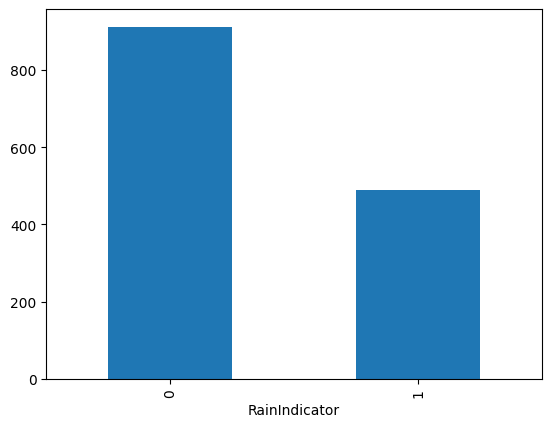

In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

rain['RainIndicator'].value_counts().plot(kind='bar')
weights = rain['RainIndicator'].value_counts(normalize=True)
print(weights) 
# Prepare the weights for the model

B) Bi-variate Analysis:
WindSpeed VS TotalRainfall

<Axes: xlabel='Mean Wind Speed (km/h)', ylabel='Total Rainfall (mm)'>

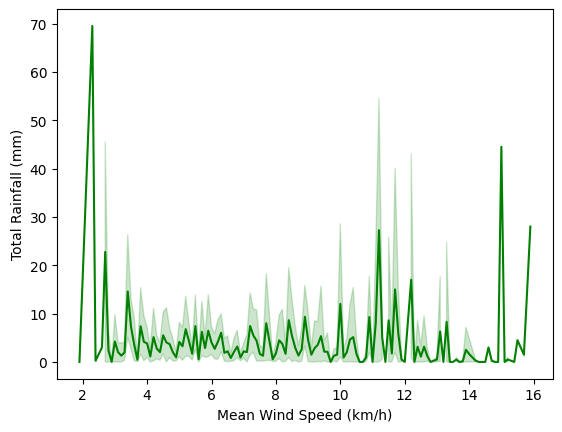

In [25]:
sns.lineplot(data=rain,x='Mean Wind Speed (km/h)',y='Total Rainfall (mm)',color='green')

Amount of Cloud VS TotalRainfall

<Axes: xlabel='Mean Amount of Cloud (%)', ylabel='Total Rainfall (mm)'>

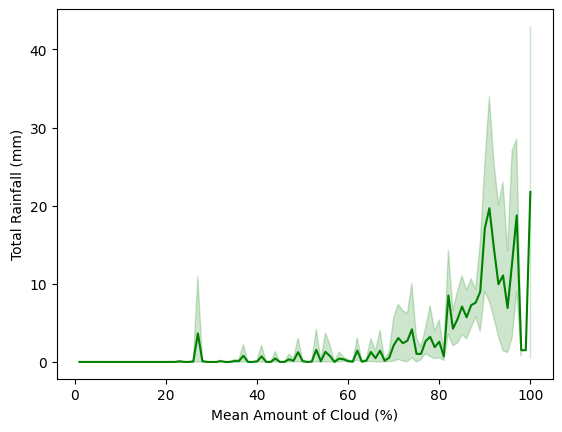

In [26]:
sns.lineplot(data=rain,x='Mean Amount of Cloud (%)',y='Total Rainfall (mm)',color='green')

# Correlation: 

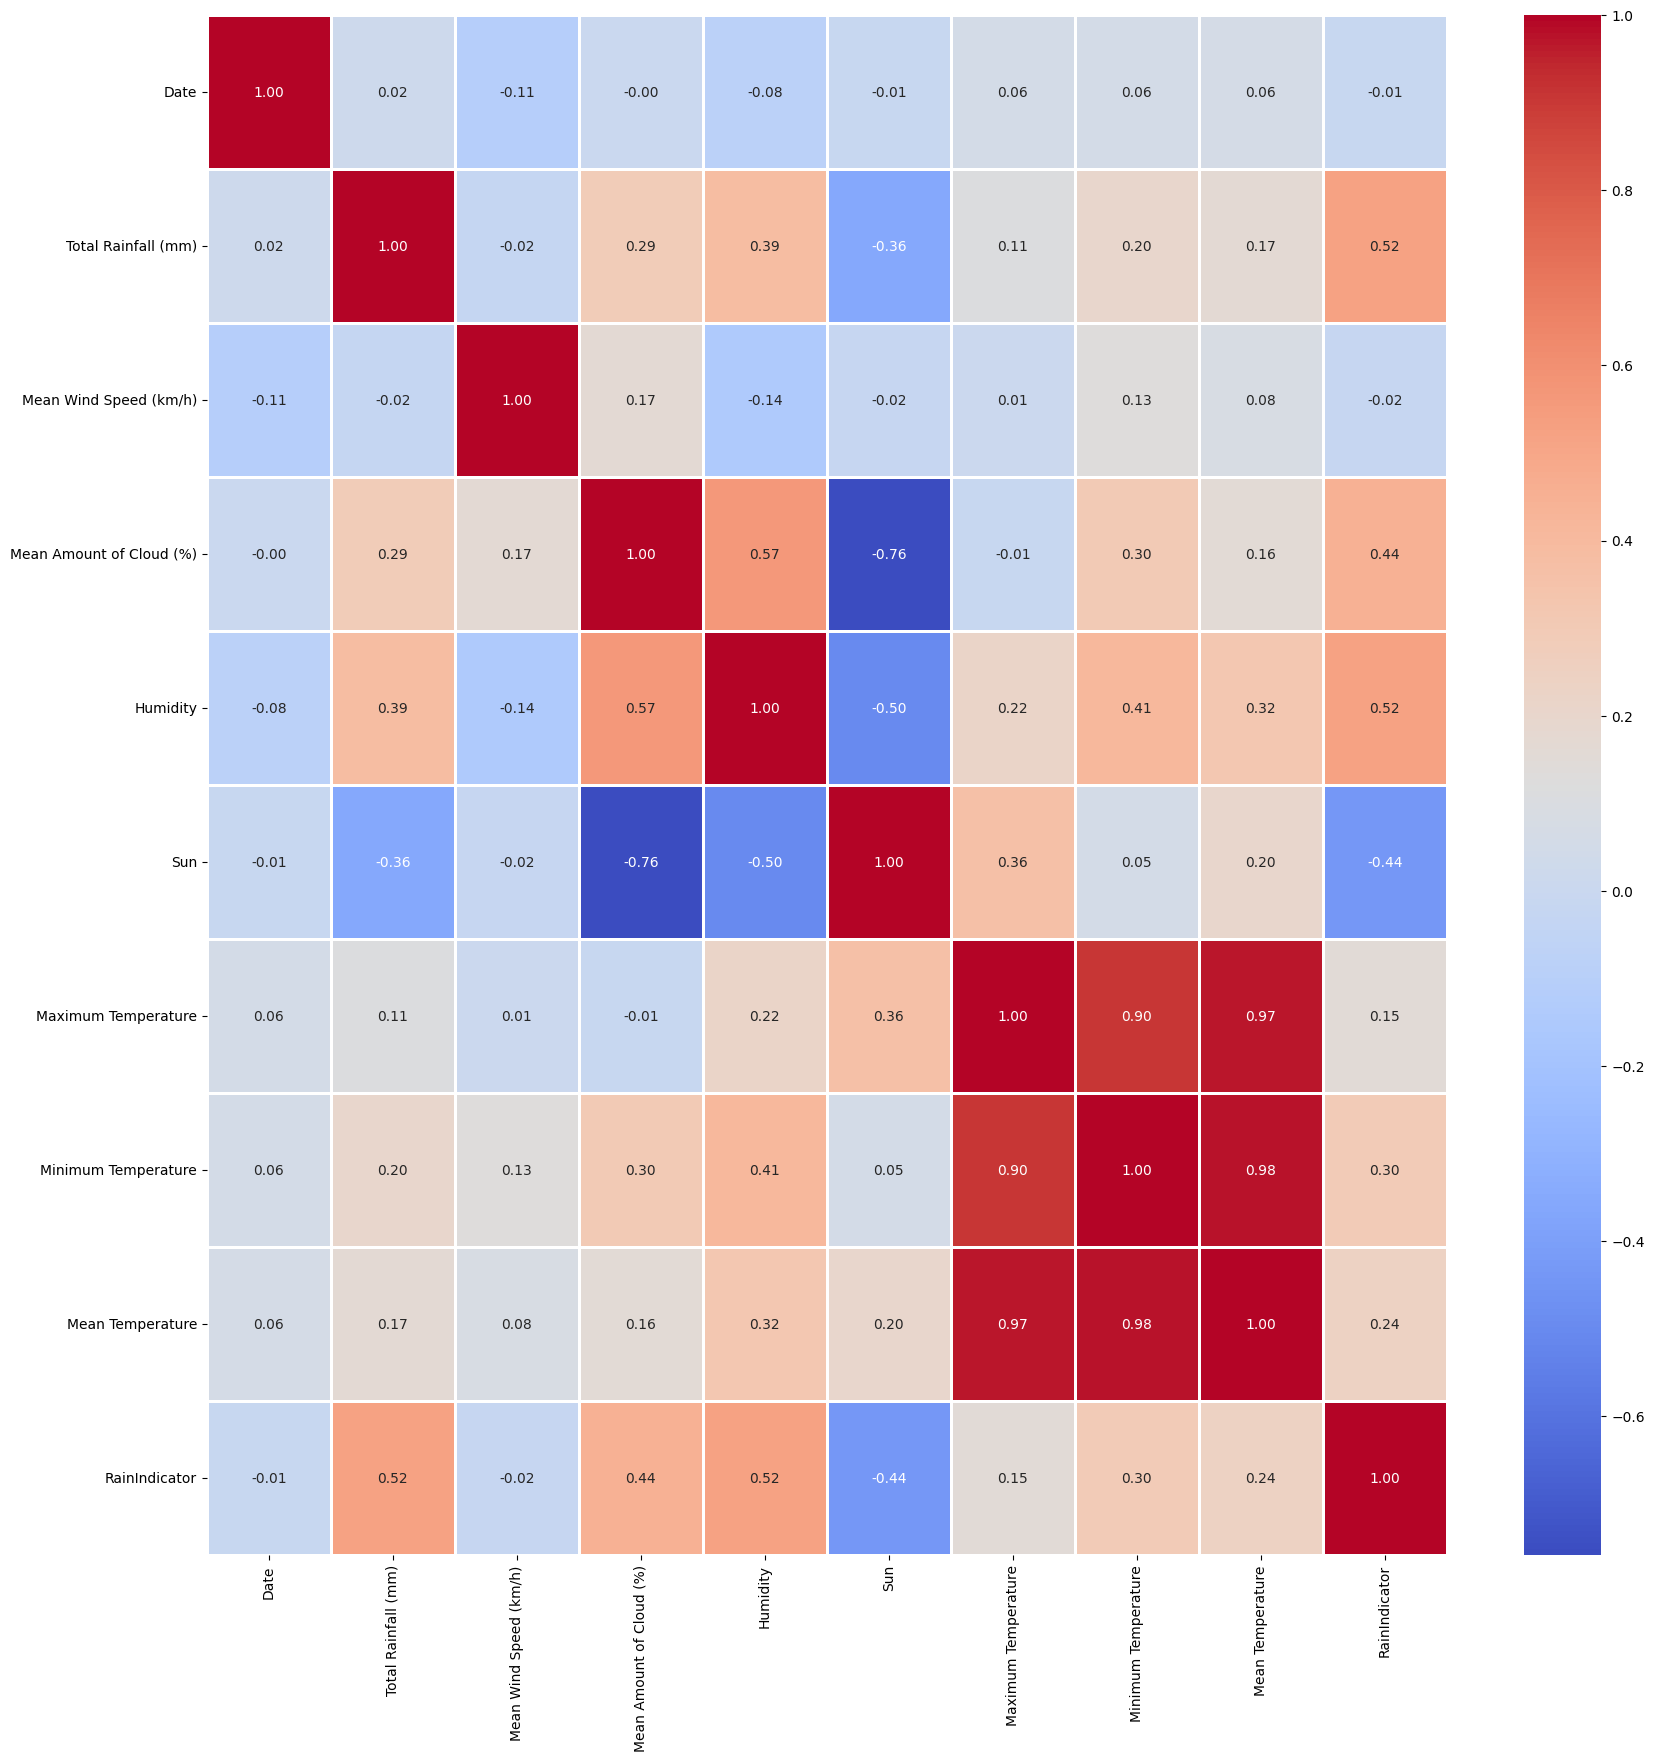

In [27]:
plt.figure(figsize=(20,20))
sns.heatmap(rain.corr(), linewidths=1, annot=True, fmt=".2f", cmap='coolwarm', cbar=True)
plt.show()

In [28]:
rain.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1402 entries, 0 to 1460
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Date                      1402 non-null   datetime64[ns]
 1   Total Rainfall (mm)       1402 non-null   float64       
 2   Mean Wind Speed (km/h)    1402 non-null   float64       
 3   Mean Amount of Cloud (%)  1402 non-null   float64       
 4   Humidity                  1402 non-null   int64         
 5   Sun                       1402 non-null   float64       
 6   Maximum Temperature       1402 non-null   float64       
 7   Minimum Temperature       1402 non-null   float64       
 8   Mean Temperature          1402 non-null   float64       
 9   RainIndicator             1402 non-null   int64         
dtypes: datetime64[ns](1), float64(7), int64(2)
memory usage: 120.5 KB


In [29]:
# Drop features with low correlation coefficients
rain.drop(['Mean Wind Speed (km/h)'], axis=1, inplace=True)
rain.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1402 entries, 0 to 1460
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Date                      1402 non-null   datetime64[ns]
 1   Total Rainfall (mm)       1402 non-null   float64       
 2   Mean Amount of Cloud (%)  1402 non-null   float64       
 3   Humidity                  1402 non-null   int64         
 4   Sun                       1402 non-null   float64       
 5   Maximum Temperature       1402 non-null   float64       
 6   Minimum Temperature       1402 non-null   float64       
 7   Mean Temperature          1402 non-null   float64       
 8   RainIndicator             1402 non-null   int64         
dtypes: datetime64[ns](1), float64(6), int64(2)
memory usage: 109.5 KB


# Time series

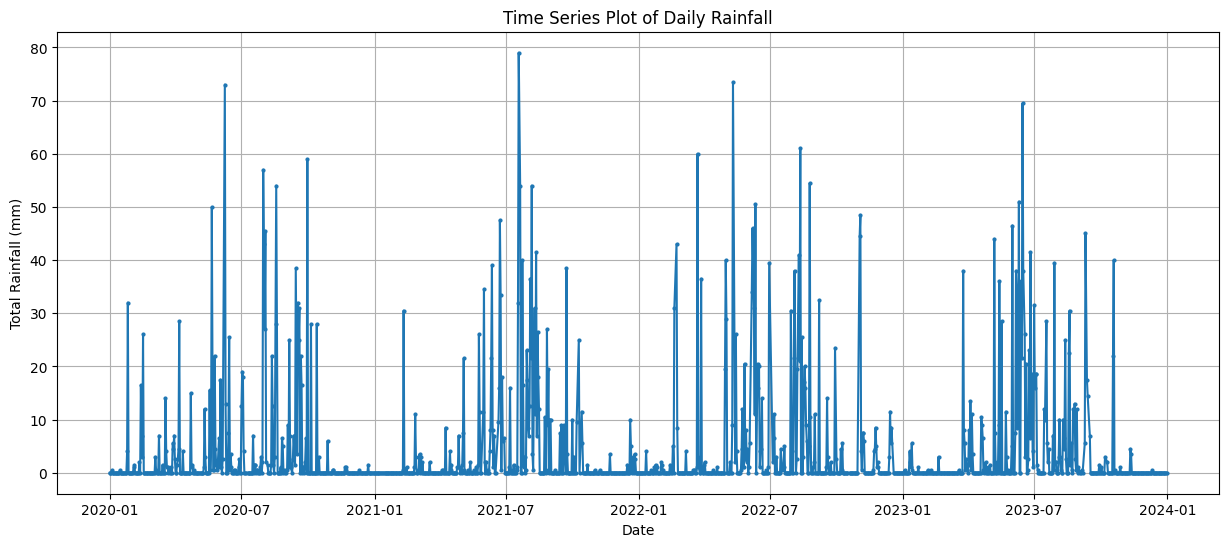

In [30]:
plt.figure(figsize=(15, 6))
plt.plot(rain['Date'], rain['Total Rainfall (mm)'], marker='o', linestyle='-', markersize=2)
plt.title('Time Series Plot of Daily Rainfall')
plt.xlabel('Date')
plt.ylabel('Total Rainfall (mm)')
plt.grid(True)
plt.show()

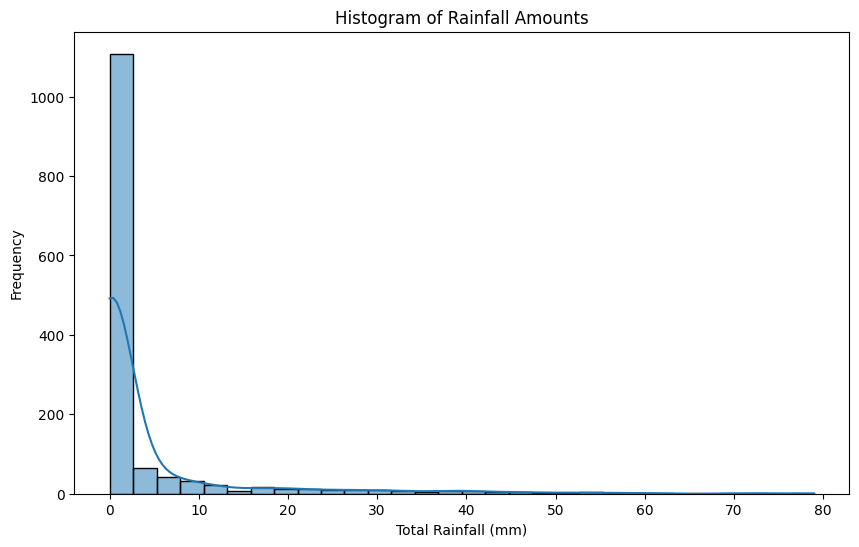

In [31]:
plt.figure(figsize=(10, 6))
sns.histplot(rain['Total Rainfall (mm)'], bins=30, kde=True)
plt.title('Histogram of Rainfall Amounts')
plt.xlabel('Total Rainfall (mm)')
plt.ylabel('Frequency')
plt.show()

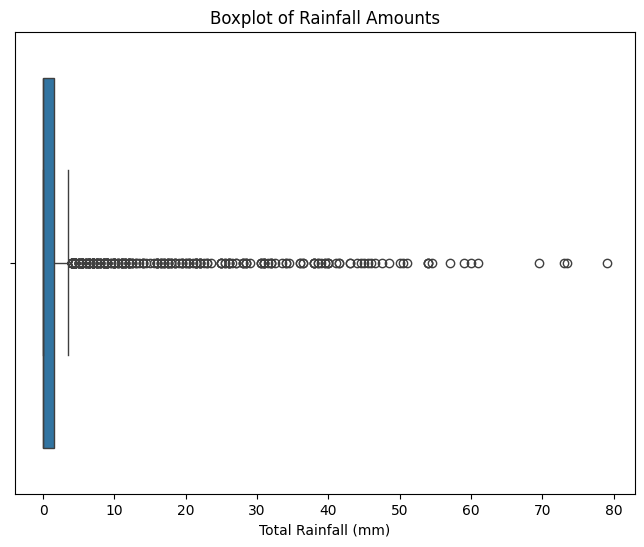

In [32]:
plt.figure(figsize=(8, 6))
sns.boxplot(x=rain['Total Rainfall (mm)'])
plt.title('Boxplot of Rainfall Amounts')
plt.xlabel('Total Rainfall (mm)')
plt.show()

# Extract month from the date

/var/folders/rt/brvtvrdj5rncm4v264dpj1rc0000gn/T/ipykernel_15217/2884862854.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=monthly_rainfall.index, y=monthly_rainfall.values, palette="viridis")


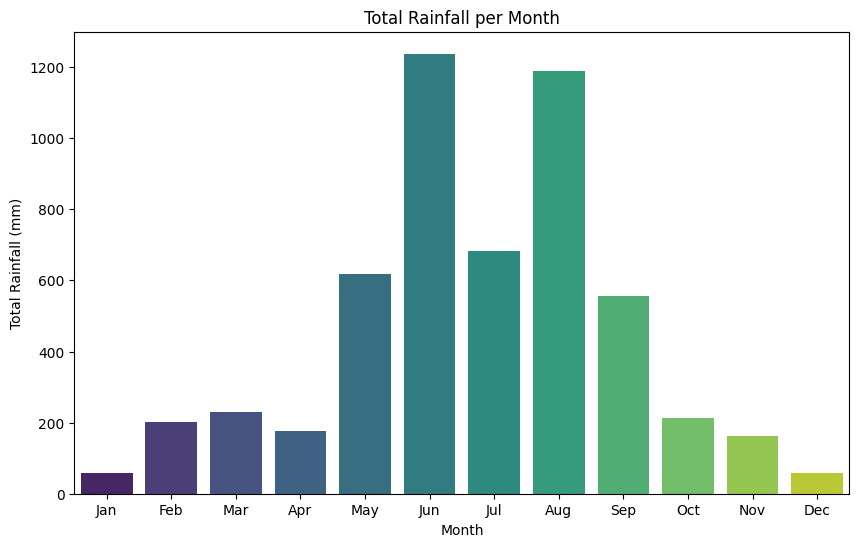

In [33]:
# Extract month from the date
rain['Month'] = rain['Date'].dt.month

# Aggregate rainfall by month
monthly_rainfall = rain.groupby('Month')['Total Rainfall (mm)'].sum()

# Setting the plot size
plt.figure(figsize=(10, 6))

# Creating the bar chart
sns.barplot(x=monthly_rainfall.index, y=monthly_rainfall.values, palette="viridis")

# Adding titles and labels
plt.title('Total Rainfall per Month')
plt.xlabel('Month')
plt.ylabel('Total Rainfall (mm)')
plt.xticks(ticks=range(12), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])

# Display the plot
plt.show()

In [34]:
# obivioulsy, the rainfall is correlated with the month of the year, so we can drop the date column and keep the month column.
print(rain.info())

<class 'pandas.core.frame.DataFrame'>
Index: 1402 entries, 0 to 1460
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Date                      1402 non-null   datetime64[ns]
 1   Total Rainfall (mm)       1402 non-null   float64       
 2   Mean Amount of Cloud (%)  1402 non-null   float64       
 3   Humidity                  1402 non-null   int64         
 4   Sun                       1402 non-null   float64       
 5   Maximum Temperature       1402 non-null   float64       
 6   Minimum Temperature       1402 non-null   float64       
 7   Mean Temperature          1402 non-null   float64       
 8   RainIndicator             1402 non-null   int64         
 9   Month                     1402 non-null   int32         
dtypes: datetime64[ns](1), float64(6), int32(1), int64(2)
memory usage: 115.0 KB
None


# Splitting data into Independent Features and Dependent Features:

In [35]:
# X – Input features
# y – target label
X = rain.drop(['RainIndicator',  'Date', 'Total Rainfall (mm)'], axis=1)
y = rain['RainIndicator']

In [36]:
# Assign a score to input/label features based on how useful they are at predicting a target variable
from sklearn.ensemble import ExtraTreesRegressor
etr_model = ExtraTreesRegressor()
etr_model.fit(X,y)
etr_model.feature_importances_

array([0.1552799 , 0.25218636, 0.19344452, 0.09223138, 0.11640399,
       0.10571176, 0.0847421 ])

<Axes: >

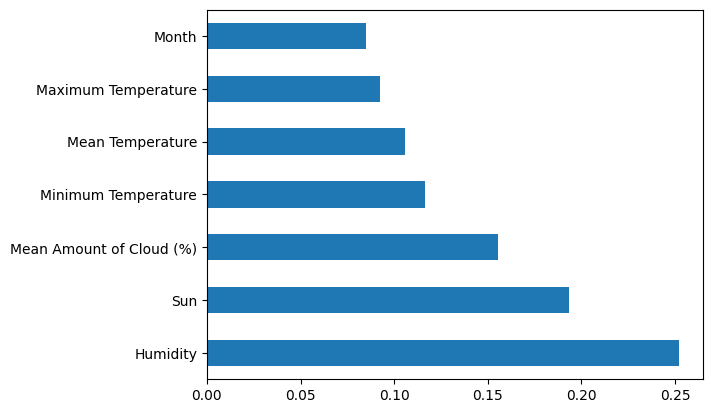

In [37]:
feature_imp = pd.Series(etr_model.feature_importances_,index=X.columns)
feature_imp.nlargest(10).plot(kind='barh')

# Splitting Data into training and testing set:

In [38]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 0)

print("Length of Training Data: {}".format(len(X_train)))
print("Length of Testing Data: {}".format(len(X_test)))
X.head()

Length of Training Data: 1121
Length of Testing Data: 281


,Mean Amount of Cloud (%),Humidity,Sun,Maximum Temperature,Minimum Temperature,Mean Temperature,Month
0,92.0,80,0.2,18.6,16.7,17.5,1
1,54.0,78,3.6,20.3,14.5,17.5,1
2,47.0,82,8.9,23.5,14.4,18.4,1
3,62.0,83,8.6,23.9,14.1,18.4,1
4,81.0,79,6.6,23.2,18.4,20.3,1


# Normalize, standardize data in range(0,1)

In [39]:
# To scale data of each column to a common level
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

#  Model Building

In [40]:
# We will use the Logistic Regression to build a predictive model to predict whether or not it will rain tomorrow in HK
# Model Training:
from sklearn.linear_model import LogisticRegression
classifier_logreg = LogisticRegression(solver='liblinear', random_state=0)
classifier_logreg.fit(X_train, y_train)

LogisticRegression(random_state=0, solver='liblinear')

In [41]:
# Model Testing:
y_pred = classifier_logreg.predict(X_test)


# Evaluating Model Performance:

In [42]:
# 1, accuracy_score()
from sklearn.metrics import accuracy_score
print("Accuracy Score: {}".format(accuracy_score(y_test,y_pred)))

Accuracy Score: 0.8149466192170819


In [43]:
# Checking for Underfitting and Overfitting:
print("Train Data Score: {}".format(classifier_logreg.score(X_train, y_train)))
print("Test Data Score: {}".format(classifier_logreg.score(X_test, y_test)))

Train Data Score: 0.8296164139161463
Test Data Score: 0.8149466192170819


In [44]:
# random forest classifier
from sklearn.ensemble import RandomForestClassifier
classifier_rf = RandomForestClassifier(n_estimators=5000, random_state=0)
classifier_rf.fit(X_train, y_train)
# evaluate the model
y_pred = classifier_rf.predict(X_test)
print("Accuracy Score: {}".format(accuracy_score(y_test,y_pred)))
print("Train Data Score: {}".format(classifier_rf.score(X_train, y_train)))

Accuracy Score: 0.8398576512455516
Train Data Score: 1.0


 The accuracy scores for both the training and testing datasets are similar. 
 This indicates that neither underfitting nor overfitting is a concern. 
 Therefore, the model is effectively generalizing to new, unseen data.

In [45]:
# 2，Confusion Matrix:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)

print("Confusion Matrix:")
print(cm)

Confusion Matrix:
[[169  11]
 [ 34  67]]


In [46]:
# 3，Classification-report:
from sklearn.metrics import classification_report

report = classification_report(y_test, y_pred)

print("Classification Report:")
print(report)

Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.94      0.88       180
           1       0.86      0.66      0.75       101

    accuracy                           0.84       281
   macro avg       0.85      0.80      0.82       281
weighted avg       0.84      0.84      0.83       281



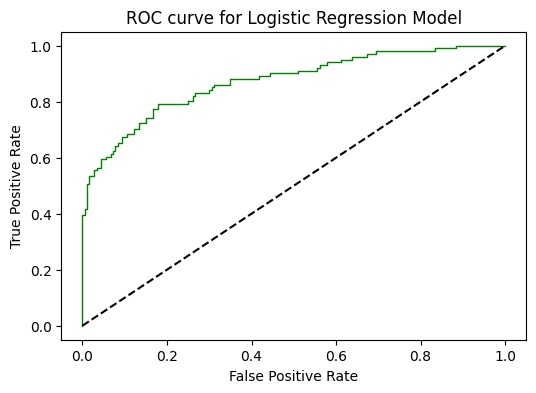

In [47]:
# 4，Receiver operating characteristic(ROC) curve:
y_pred_logreg_proba = classifier_logreg.predict_proba(X_test)
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_logreg_proba[:,1])
plt.figure(figsize=(6,4))
plt.plot(fpr,tpr,'-g',linewidth=1)
plt.plot([0,1], [0,1], 'k--' )
plt.title('ROC curve for Logistic Regression Model')
plt.xlabel("False Positive Rate")
plt.ylabel('True Positive Rate')
plt.show()

# Cross-Validation:

In [48]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(classifier_logreg, X_train, y_train, cv = 5, scoring='accuracy')
print('Cross-validation scores:{}'.format(scores))
print('Average cross-validation score: {}'.format(scores.mean()))

Cross-validation scores:[0.82222222 0.875      0.81696429 0.80803571 0.79464286]
Average cross-validation score: 0.8233730158730159


In [49]:
# The mean accuracy score of cross-validation is lower than the original model's accuracy score, which is 0.8737. 
# The model's accuracy may not improve using cross-validation, possibly due to limited data availability. 
# Our dataset is relatively small, with just over 1000 records, and cross-validation may not be sufficient to capture all aspects of the data stably. 
# With such a small dataset, the model's generalization capability might be limited because the training samples may not adequately represent the complexity of the overall data.

In [50]:
# This could also be due to an imbalance in the data. 
# In our dataset, the number of samples in the "No Rain (0)" category far exceeds those in the "Rain (1)" category, 
# which may cause the model to be biased towards the majority class, resulting in a higher accuracy in the original model test. 
# Cross-validation, by more fairly evaluating the model's performance across different subsets, may reveal deficiencies in the model's handling of the less represented category.

# Adding one more time-series feature to build the second model:

In [51]:
rain2 = rain.copy()
rain2['Date'] = pd.to_datetime(rain2['Date'])

#Create a new feature: two-day average rainfall
rain2['Two-Day Average Rainfall'] = rain2['Total Rainfall (mm)'].shift(1).rolling(window=2).mean()

# Replace NaN values in the first two rows with 0
rain2['Two-Day Average Rainfall'] = rain2['Two-Day Average Rainfall'].fillna(0)

rain2.head()

,Date,Total Rainfall (mm),Mean Amount of Cloud (%),Humidity,Sun,Maximum Temperature,Minimum Temperature,Mean Temperature,RainIndicator,Month,Two-Day Average Rainfall
0,2020-01-01,0.0,92.0,80,0.2,18.6,16.7,17.5,0,1,0.00
1,2020-01-02,0.0,54.0,78,3.6,20.3,14.5,17.5,0,1,0.00
2,2020-01-03,0.0,47.0,82,8.9,23.5,14.4,18.4,0,1,0.00
3,2020-01-04,0.5,62.0,83,8.6,23.9,14.1,18.4,1,1,0.00
4,2020-01-05,0.0,81.0,79,6.6,23.2,18.4,20.3,0,1,0.25


<Axes: >

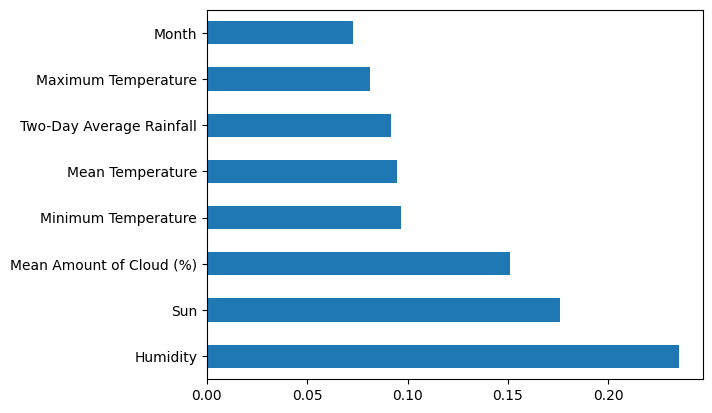

In [52]:
X2 = rain2.drop(['RainIndicator', 'Date', 'Total Rainfall (mm)'], axis=1)
y2 = rain2['RainIndicator']

from sklearn.ensemble import ExtraTreesRegressor
etr_model = ExtraTreesRegressor()
etr_model.fit(X2,y2)
etr_model.feature_importances_

feature_imp = pd.Series(etr_model.feature_importances_,index=X2.columns)
feature_imp.nlargest(10).plot(kind='barh')

In [53]:
from sklearn.model_selection import train_test_split
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2,y2, test_size = 0.2, random_state = 0)

print("Length of Training Data: {}".format(len(X_train2)))
print("Length of Testing Data: {}".format(len(X_test2)))

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train2 = scaler.fit_transform(X_train2)
X_test2 = scaler.transform(X_test2)

Length of Training Data: 1121
Length of Testing Data: 281


In [54]:
from sklearn.linear_model import LogisticRegression
classifier_logreg2 = LogisticRegression(solver='liblinear', random_state=0)
classifier_logreg2.fit(X_train2, y_train2)

LogisticRegression(random_state=0, solver='liblinear')

In [55]:
y_pred2 = classifier_logreg2.predict(X_test2)

from sklearn.metrics import accuracy_score
print("Accuracy Score of the second classifier: {}".format(accuracy_score(y_test2,y_pred2)))

Accuracy Score of the second classifier: 0.8291814946619217


# Add weights to balance the data and improve the recall score of the model:

In [92]:
# random forest classifier
from sklearn.ensemble import RandomForestClassifier
classifier_rf = RandomForestClassifier(n_estimators=5000, random_state=42, class_weight={0: weights[1], 1: weights[0] * 5})
classifier_rf.fit(X_train, y_train)
# evaluate the model
y_pred = classifier_rf.predict(X_test)
print("Accuracy Score: {}".format(accuracy_score(y_test,y_pred)))
print("Train Data Score: {}".format(classifier_rf.score(X_train, y_train)))

Accuracy Score: 0.8469750889679716
Train Data Score: 1.0


In [93]:
# Confusion Matrix:
report = classification_report(y_test, y_pred)
print("Classification Report:")
print(report)

Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.96      0.89       180
           1       0.90      0.64      0.75       101

    accuracy                           0.85       281
   macro avg       0.87      0.80      0.82       281
weighted avg       0.85      0.85      0.84       281



# Dynamic Prediction:

In [99]:
# Predict the probability of rain tomorrow
X = rain.drop(['RainIndicator', 'Date', 'Total Rainfall (mm)'], axis=1)
y = rain['RainIndicator']

# Drop the first day and the last day of the dataset
X = X.iloc[:-1]
y = y.iloc[1:]

In [105]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(1120, 7) (281, 7) (1120,) (281,)


In [108]:
# random forest classifier
from sklearn.ensemble import RandomForestClassifier
classifier_rf = RandomForestClassifier(n_estimators=5000, random_state=42, class_weight={0: weights[1], 1: weights[0]})
classifier_rf.fit(X_train, y_train)
# evaluate the model
y_pred = classifier_rf.predict(X_test)
print("Accuracy Score: {}".format(accuracy_score(y_test,y_pred)))
print("Train Data Score: {}".format(classifier_rf.score(X_train, y_train)))

Accuracy Score: 0.7615658362989324
Train Data Score: 1.0


In [109]:
# Confusion Matrix:
report = classification_report(y_test, y_pred)
print("Classification Report:")
print(report)

Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.90      0.83       184
           1       0.72      0.51      0.59        97

    accuracy                           0.76       281
   macro avg       0.75      0.70      0.71       281
weighted avg       0.76      0.76      0.75       281



# Bayesian Optimization:

In [111]:
# Bayesian optimization

from skopt import BayesSearchCV
from skopt.space import Real, Categorical, Integer

search_space = {
    'n_estimators': Integer(100, 5000),
    'max_depth': Integer(1, 50),
    'min_samples_split': Real(0.01, 1.0, 'log-uniform'),
    'max_features': Categorical(['sqrt', 'log2', None])
}

rf = RandomForestClassifier(random_state=42)

opt = BayesSearchCV(rf, search_space, n_iter=32, random_state=42, cv=3)
opt.fit(X_train, y_train)

print("Best parameters:", opt.best_params_)
print("Best score:", opt.best_score_)

y_pred = opt.predict(X_test)
print("Test Accuracy:", accuracy_score(y_test, y_pred))

Best parameters: OrderedDict([('max_depth', 31), ('max_features', None), ('min_samples_split', 0.05224513597711275), ('n_estimators', 4384)])
Best score: 0.7660941539667293
Test Accuracy: 0.7508896797153025
